In [465]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [466]:
data = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [468]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [469]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [470]:
df.dropna(inplace=True)

In [ ]:
pp.ProfileReport(data)

In [471]:
X = df.drop('TenYearCHD', axis=1 , inplace=False)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 40)

In [472]:
LRmodel = LogisticRegression()
model = LRmodel.fit(X_train, y_train)
LRmodel_predictict = LRmodel.predict(X_test)
LRmodel_matrix = confusion_matrix(y_test, LRmodel_predictict)
LRmodel_acc = accuracy_score(y_test, LRmodel_predictict)

In [473]:
print("Logistic Regression:", LRmodel_acc,"\n")
print(classification_report(y_test,LRmodel_predictict))

Logistic Regression: 0.8522975929978118 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       778
           1       0.57      0.03      0.06       136

    accuracy                           0.85       914
   macro avg       0.71      0.51      0.49       914
weighted avg       0.81      0.85      0.79       914



In [474]:
XGBmodel = XGBClassifier(learning_rate=0.01, n_estimators=30, max_depth=20,gamma=0.7, subsample=0.5,colsample_bytree=0.7,seed=25, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.7, colsample_bynode=0.5)
XGBmodel.fit(X_train, y_train)
XGBmodel_predictict = XGBmodel.predict(X_test)
XGBmodel_matrix = confusion_matrix(y_test, XGBmodel_predictict)
XGBmodel_acc = accuracy_score(y_test, XGBmodel_predictict)

In [475]:
print("XGBoost:", XGBmodel_acc,"\n")
print(classification_report(y_test,XGBmodel_predictict))

XGBoost: 0.849015317286652 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       778
           1       0.00      0.00      0.00       136

    accuracy                           0.85       914
   macro avg       0.43      0.50      0.46       914
weighted avg       0.72      0.85      0.78       914



In [476]:
RFCmodel = RandomForestClassifier(n_estimators=25, random_state=15,max_depth=8)
RFCmodel.fit(X_train, y_train)
RFCmodel_predictict = RFCmodel.predict(X_test)
RFCmodel_matrix = confusion_matrix(y_test, RFCmodel_predictict)
RFCmodel_acc = accuracy_score(y_test, RFCmodel_predictict)

In [477]:
print("RandomForestClassifier:", XGBmodel_acc,"\n")
print(classification_report(y_test,RFCmodel_predictict))

RandomForestClassifier: 0.849015317286652 

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       778
           1       0.25      0.01      0.03       136

    accuracy                           0.85       914
   macro avg       0.55      0.50      0.47       914
weighted avg       0.76      0.85      0.78       914



In [478]:
model_graph = pd.DataFrame({'Model': ['Logistic Regression','XGBoost','Random Forest'],
                         'Accuracy': [LRmodel_acc*100,XGBmodel_acc*100,RFCmodel_acc*100,]})

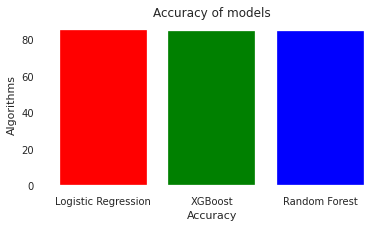

,Model,Accuracy
0,Logistic Regression,85.229759
1,XGBoost,84.901532
2,Random Forest,84.682713


In [479]:
colors = ['red','green','blue']
plt.figure(figsize=(6,3))
plt.title("Accuracy of models")
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.bar(model_graph['Model'],model_graph['Accuracy'],color = colors)
plt.show()
model_graph